In [2]:
# interactive
%matplotlib notebook
# QT exterenal window
# %matplotlib qt
# non interactive
# %matplotlib inline

# This examples shows who to download files from the ONC server
import glob
import os

import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import strawb
import strawb.sensors.module
import strawb.tools

plt.rcParams.update({"text.usetex": False})  # fix time fmt of x_ticks

In [5]:
# module_name = 'TUMSTANDARDMODULE001'

# get all possible dev_codes
dev_codes = set([i['dev_code'] for i in strawb.module_onc_id.values()])
# subtract not deployed dev_codes
dev_codes = dev_codes.difference(['TEST', 'UNITTEST', 'TUMSTANDARDMODULE002', 'TUMSTANDARDMODULE003'])

module_list = []

## Download the files from the ONC server

In [4]:
onc_downloader = strawb.ONCDownloader(showInfo=False)

for dev_i in dev_codes:
    filters = {'deviceCode': dev_i,
               'dateFrom': '2021-01-01T00:00:00.000Z',
               'dateTo': '2022-01-01T23:59:59.000Z',
               'dataProductCode': 'SMRD',  # download only 'MODULE' data
               'extension': 'hdf5'}

    # download in foreground, (use 'onc_downloader.start(...)' for background)
    onc_downloader.download_file(filters=filters, allPages=True)

Download in directory: /Users/kilian/PycharmProjects/strawb_package/raw_module_data
100%|██████████| 342/342 [00:00<00:00, 795.73file/s, i=TUMPMTSPECTROMETER001_20210101T000000.000Z-SDAQ-MODULE.hdf5] 
0 files (0 Bytes) downloaded
Total Download Time: 0.000 seconds
Download in directory: /Users/kilian/PycharmProjects/strawb_package/raw_module_data
100%|██████████| 271/271 [00:00<00:00, 560.54file/s, i=TUMMINISPECTROMETER001_20210220T000000.000Z-SDAQ-MODULE.hdf5]
0 files (0 Bytes) downloaded
Total Download Time: 0.000 seconds
Download in directory: /Users/kilian/PycharmProjects/strawb_package/raw_module_data
100%|██████████| 432/432 [00:00<00:00, 748.26file/s, i=TUMPMTSPECTROMETER002_20210217T000000.000Z-SDAQ-MODULE.hdf5] 
0 files (0 Bytes) downloaded
Total Download Time: 0.000 seconds
Download in directory: /Users/kilian/PycharmProjects/strawb_package/raw_module_data
100%|██████████| 268/268 [00:00<00:00, 607.32file/s, i=TUMSTANDARDMODULE001_20210203T000000.000Z-SDAQ-MODULE.hdf5]
0 file

# create a combined HDF5 file

In [6]:
for dev_i in dev_codes:
    # get a list with all filenames that should be included in the virtual HDF5 file
    f_names = glob.glob(f'{strawb.config_parser.config_parser.Config.raw_data_dir}/{module_name}_*MODULE.hdf5')
    f_names.sort()  # f_names should be sorted

    # create the virtual HDF5 file, f_names should be sorted, otherwise the data isn't sorted
    strawb.VirtualHDF5(f'{module_name}_MODULE.h5',
                       f_names,
                       obj_dict_filter=strawb.DatasetsInGroupSameSize)

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210617T000000.000Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 1190313, sblock->base_addr = 0, stored_eof = 1194052)
Not all datasets in group: "/temperatures"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210701T111102.818Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/temperatures"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210701T112839.639Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210226T183205.965Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210226T183314.371Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_pac

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210617T000000.000Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 1190313, sblock->base_addr = 0, stored_eof = 1194052)
Not all datasets in group: "/temperatures"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210701T111102.818Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/temperatures"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210701T112839.639Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210226T183205.965Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210226T183314.371Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_pac

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210617T000000.000Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 1190313, sblock->base_addr = 0, stored_eof = 1194052)
Not all datasets in group: "/temperatures"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210701T111102.818Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/temperatures"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210701T112839.639Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210226T183205.965Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMSTANDARDMODULE001_20210226T183314.371Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_pac

# Load a file
## can be a single or combined aka. virtual HDF5 file

In [7]:
# get all possible dev_codes
dev_codes = set([i['dev_code'] for i in strawb.module_onc_id.values()])
# subtract not deployed dev_codes
dev_codes = dev_codes.difference(['TEST', 'UNITTEST', 'TUMSTANDARDMODULE002', 'TUMSTANDARDMODULE003'])

module_list = []

for dev_i in dev_codes:
    module_list.append(strawb.sensors.module.FileHandler(f'{dev_i}_MODULE.h5'))

In [8]:
module_list

In [17]:
for module in module_list:
    print([i for i in module.file if 'lucifer' in i])

['lucifer_51', 'lucifer_52', 'lucifer_53', 'lucifer_54']
['lucifer_51', 'lucifer_53']
['lucifer_51', 'lucifer_52', 'lucifer_53', 'lucifer_54']
['lucifer_51', 'lucifer_52']
['lucifer_51', 'lucifer_53']
[]
['lucifer_51', 'lucifer_52']
['lucifer_51', 'lucifer_52', 'lucifer_53', 'lucifer_54']


In [14]:
module.accel_time[:]

1626307191.898911

<IPython.core.display.Javascript object>


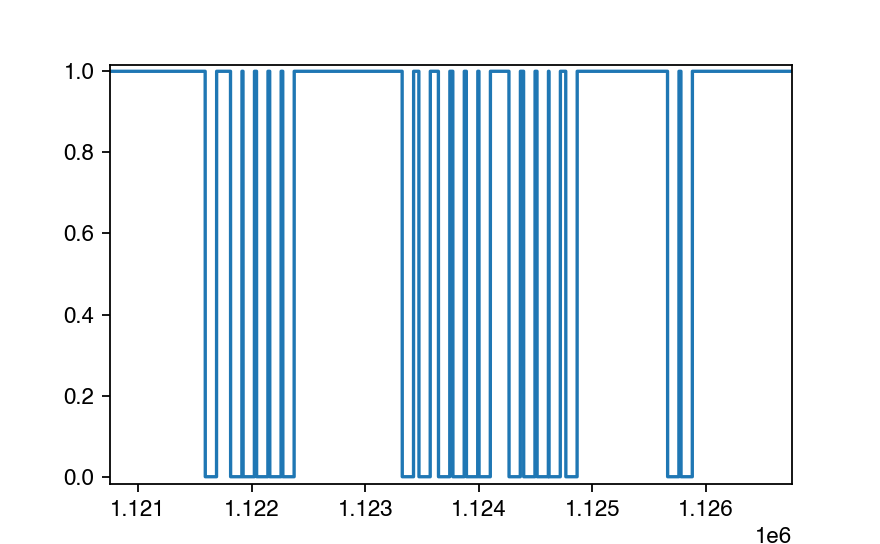

In [16]:
plt.figure()

plt.plot(module.accel_time[:] > 0)

<IPython.core.display.Javascript object>


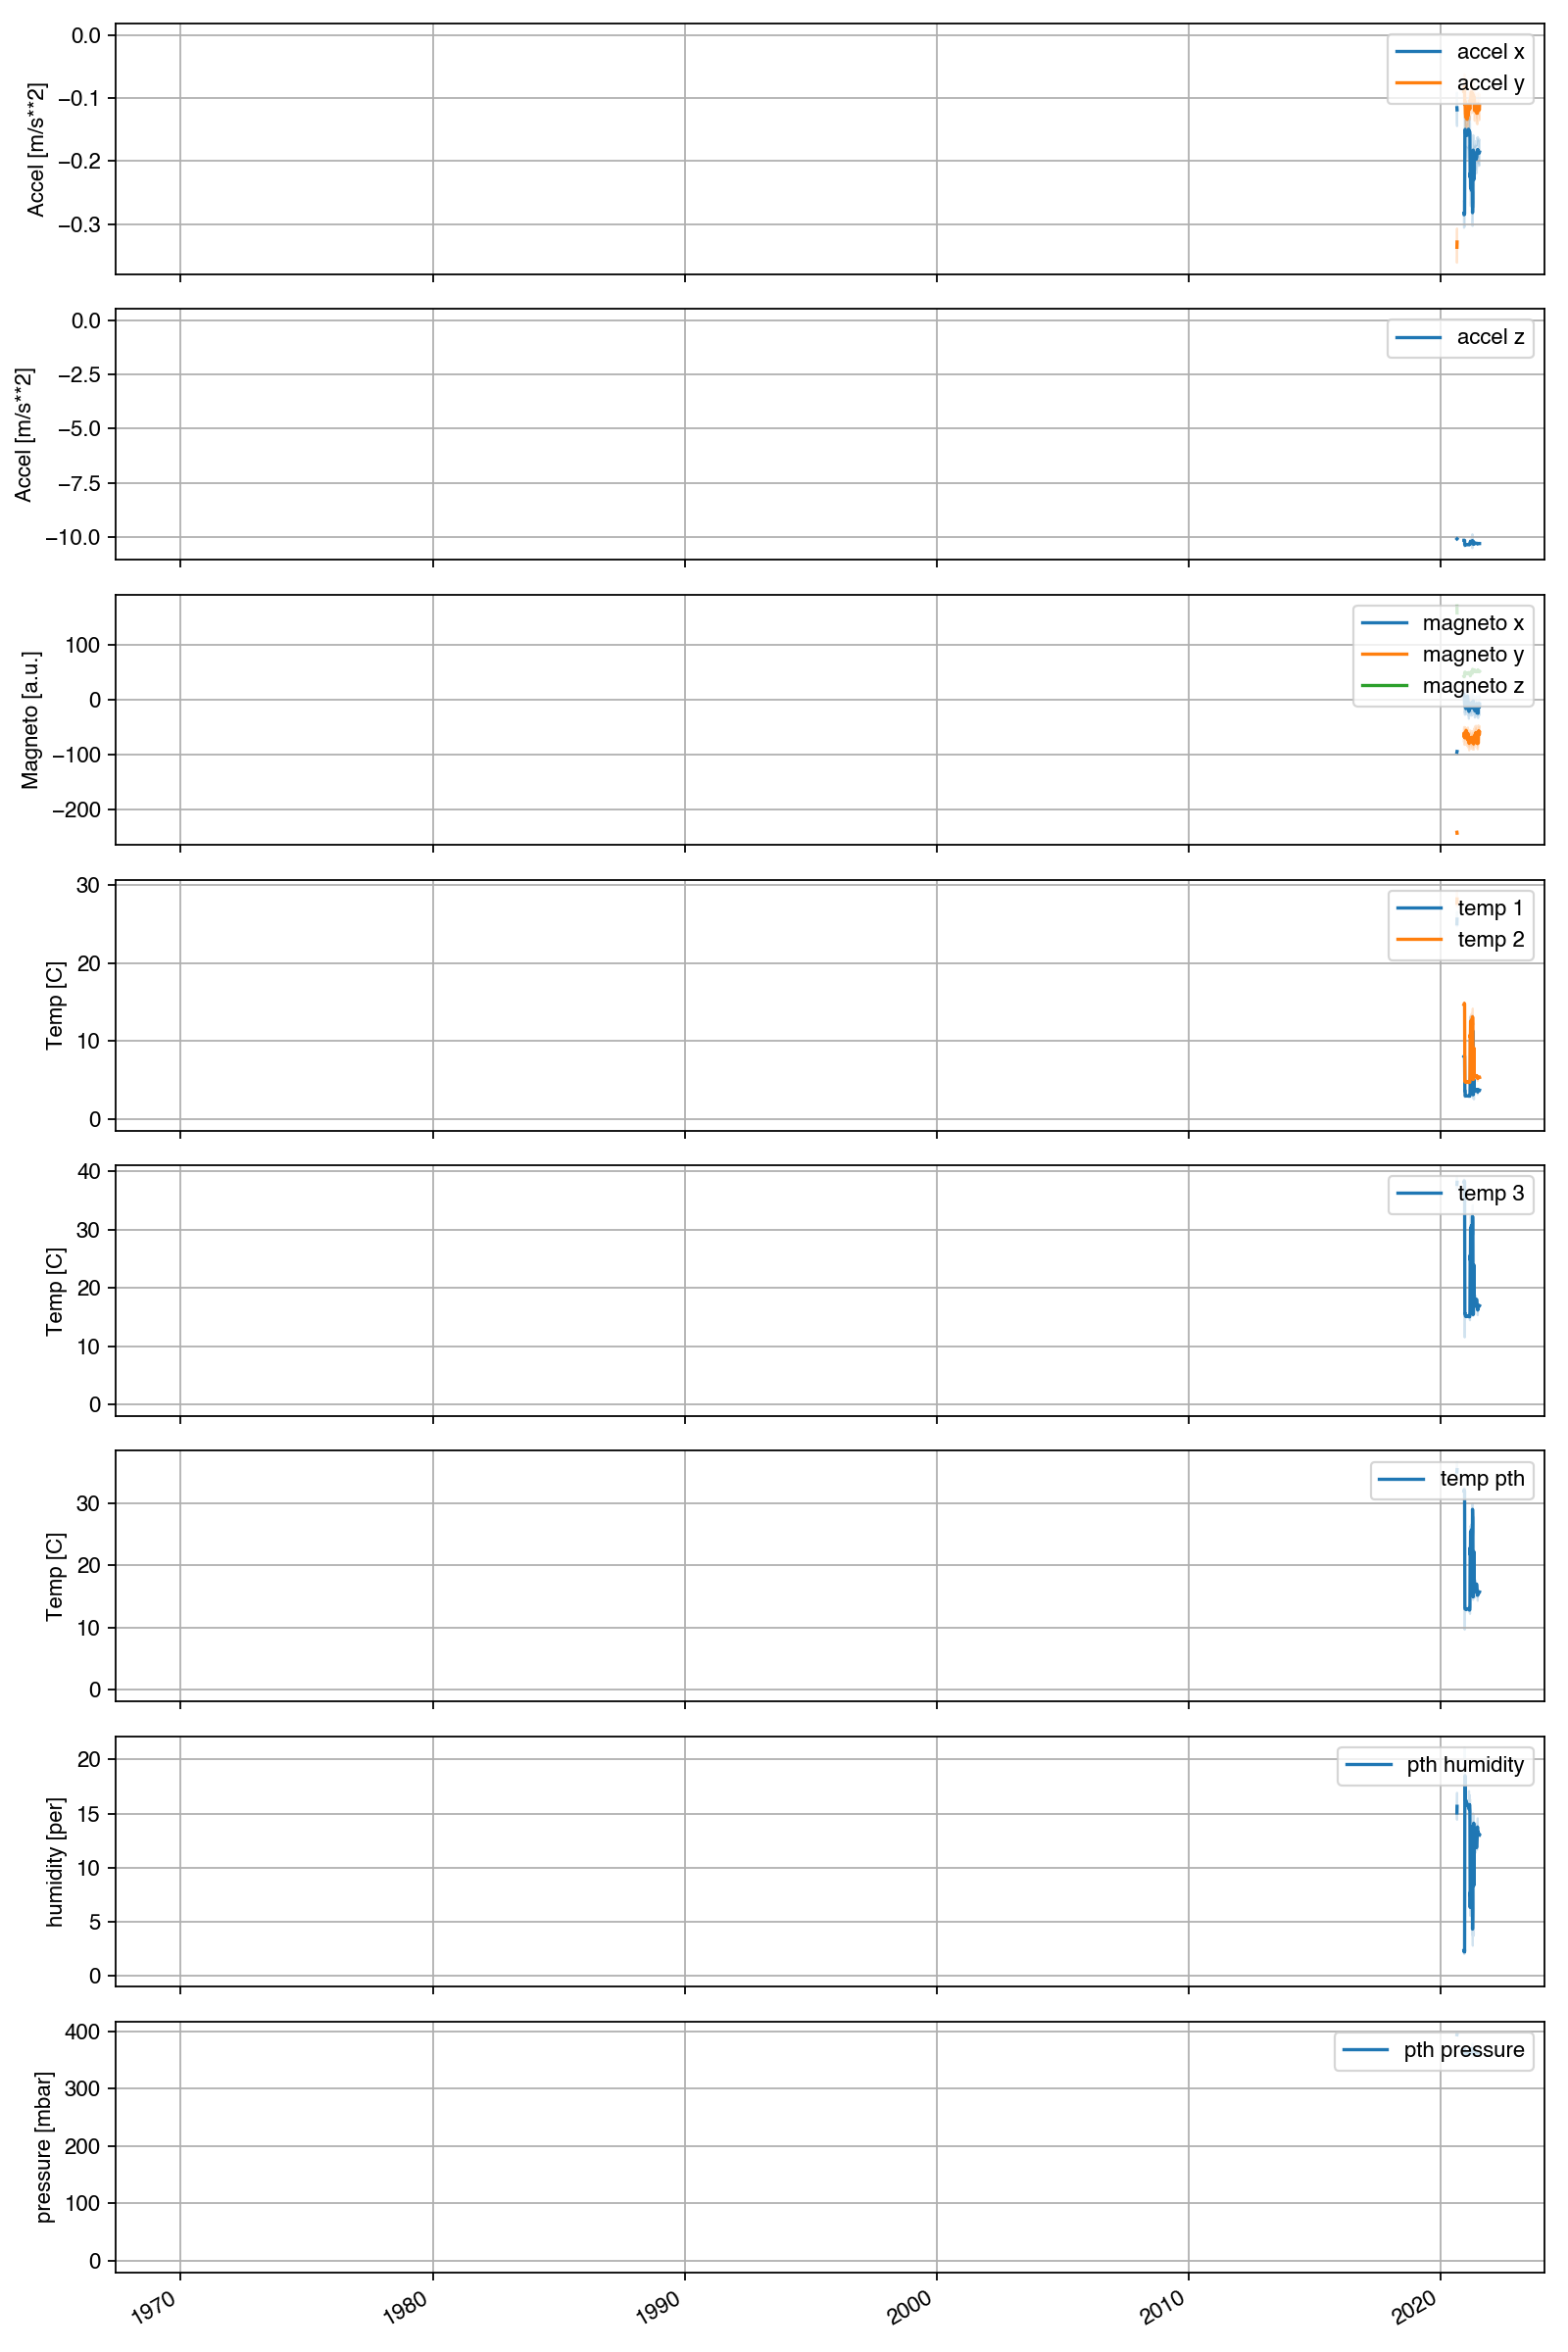

In [11]:
fig, ax = plt.subplots(nrows=8, squeeze=False, figsize=(10,15), sharex=True)
ax = ax.flatten()

i = 0

# ACCEL
strawb.tools.plot_binned_mean(module.accel_time, module.accel_x[:]*9.81, ax=ax[i], label='accel x')
strawb.tools.plot_binned_mean(module.accel_time, module.accel_y[:]*9.81, ax=ax[i], label='accel y')
ax[i].set_ylabel('Accel [m/s**2]')
i += 1
strawb.tools.plot_binned_mean(module.accel_time, module.accel_z[:]*9.81, ax=ax[i], label='accel z')
ax[i].set_ylabel('Accel [m/s**2]')
i += 1

# Magnet
strawb.tools.plot_binned_mean(module.magneto_time, module.magneto_x, ax=ax[i], label='magneto x')
strawb.tools.plot_binned_mean(module.magneto_time, module.magneto_y, ax=ax[i], label='magneto y')
strawb.tools.plot_binned_mean(module.magneto_time, module.magneto_z, ax=ax[i], label='magneto z')
ax[i].set_ylabel('Magneto [a.u.]')
i += 1

# TEMP.
strawb.tools.plot_binned_mean(module.temperatures_time, module.temperatures_temp1, ax=ax[i], label='temp 1')
strawb.tools.plot_binned_mean(module.temperatures_time, module.temperatures_temp2, ax=ax[i], label='temp 2')
ax[i].set_ylabel('Temp [C]')
i += 1
strawb.tools.plot_binned_mean(module.temperatures_time, module.temperatures_temp3, ax=ax[i], label='temp 3')
ax[i].set_ylabel('Temp [C]')
i += 1

# PTH
strawb.tools.plot_binned_mean(module.pth_time, module.pth_temperature, ax=ax[i], label='temp pth')
ax[i].set_ylabel('Temp [C]')
i += 1

strawb.tools.plot_binned_mean(module.pth_time, module.pth_humidity, ax=ax[i], label='pth humidity')
ax[i].set_ylabel('humidity [per]')
i += 1

strawb.tools.plot_binned_mean(module.pth_time, module.pth_pressure, ax=ax[i], label='pth pressure')
ax[i].set_ylabel('pressure [mbar]')
i += 1

for ax_i in ax:
    ax_i.legend(loc=1)
    ax_i.grid()

# # set limits
# limits = np.array([[ax_i.dataLim.x0, ax_i.dataLim.x1] for ax_i in ax])
# ax[-1].set_xlim((limits[:,0].min(), limits[:,1].max()))
    
fig.autofmt_xdate()
locator = mdates.AutoDateLocator()
#fmt = mdates.AutoDateFormatter(locator, usetex=True)
fmt = mdates.ConciseDateFormatter(locator)
ax[-1].xaxis.set_major_formatter(fmt)
plt.tight_layout()

In [10]:
limits = np.array([[ax_i.dataLim.x0, ax_i.dataLim.x1] for ax_i in ax])
limits

array([[9.41149995e-01, 1.88220588e+04],
       [9.41149995e-01, 1.88220588e+04],
       [9.41149995e-01, 1.88220588e+04],
       [9.41149996e-01, 1.88220588e+04],
       [9.41149996e-01, 1.88220588e+04],
       [9.41149995e-01, 1.88220588e+04],
       [9.41149995e-01, 1.88220588e+04],
       [9.41149995e-01, 1.88220588e+04]])

In [ ]:
# get all possible dev_codes
dev_codes = set([i['dev_code'] for i in strawb.module_onc_id.values()])
# subtract not deployed dev_codes
dev_codes = dev_codes.difference(['TEST', 'UNITTEST', 'TUMSTANDARDMODULE002', 'TUMSTANDARDMODULE003'])

module_list = []

for dev_i in dev_codes:
    # get a list with all filenames that should be included in the virtual HDF5 file
    f_names = glob.glob(f'{strawb.config_parser.config_parser.Config.raw_data_dir}/{dev_i}_*MODULE.hdf5')
    f_names.sort()  # f_names should be sorted

    # create the virtual HDF5 file, f_names should be sorted, otherwise the data isn't sorted
    virtual_hdf5_gen = strawb.VirtualHDF5(f'{dev_i}_MODULE.h5',
                                          f_names,
                                          obj_dict_filter=strawb.DatasetsInGroupSameSize)

    module_list.append(strawb.sensors.module.FileHandler(f'{dev_i}_MODULE.h5'))

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210422T020754.136Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 237568, sblock->base_addr = 0, stored_eof = 243568)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210422T034817.912Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 193904, sblock->base_addr = 0, stored_eof = 195184)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210422T054349.375Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210422T212330.990Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 195184)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210423T000000.000Z-SDAQ-MODULE.hdf5: Unable to open 

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210501T002653.148Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210501T012655.983Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210501T022658.366Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210501T032701.685Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210501T042704.777Z-SDAQ-MODULE.hdf5: Unable to open 

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210503T063055.383Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210503T073101.095Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210503T083103.222Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210503T093106.546Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210503T103109.081Z-SDAQ-MODULE.hdf5: Unable to open 

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210506T063057.732Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210506T073057.844Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210506T083057.259Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210506T093103.839Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210506T103117.583Z-SDAQ-MODULE.hdf5: Unable to open 

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210517T123521.892Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 177138, sblock->base_addr = 0, stored_eof = 179618)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210517T123944.361Z-SDAQ-MODULE.hdf5: Unable to open file (file signature not found)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210517T142303.378Z-SDAQ-MODULE.hdf5: Unable to open file (file signature not found)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210517T143444.675Z-SDAQ-MODULE.hdf5: Unable to open file (file signature not found)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR002_20210517T145018.225Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 176584, sblock->base_addr = 0, stored_eof = 180408)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR001_20210409T000000.000Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 984144, sblock->base_addr = 0, stored_eof = 992848)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR001_20210617T000000.000Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 1211889, sblock->base_addr = 0, stored_eof = 1215918)
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR001_20210226T170649.010Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR001_20210301T152515.893Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMLIDAR001_20210302T114804.626Z-SDAQ-MODULE.hdf5"
Not all datasets in group: "/lucifer_51"; file: "/Users/kilian/PycharmProjects/stra

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210421T000000.000Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 1387248, sblock->base_addr = 0, stored_eof = 1394672)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210422T000040.669Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210422T000546.097Z-SDAQ-MODULE.hdf5: Unable to open file (file signature not found)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210422T005218.589Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 151664, sblock->base_addr = 0, stored_eof = 160368)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210422T012656.368Z-SDAQ-MODULE.hdf5: Unable to open file (truncated 

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210426T125857.692Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 177776, sblock->base_addr = 0, stored_eof = 186480)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210426T133317.739Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210426T142312.219Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210426T152319.955Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210426T162327.723Z-SDA

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210428T092856.137Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210428T102903.738Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210428T112911.603Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210428T122919.126Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210428T132927.253Z-SDA

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210430T114752.452Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210430T124803.031Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210430T134813.245Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210430T144836.956Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210430T154848.417Z-SDA

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210502T075636.461Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210502T085648.011Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210502T095657.933Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210502T105706.950Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210502T115722.490Z-SDA

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210504T201715.206Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 195184)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210505T132716.569Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210505T135458.607Z-SDAQ-MODULE.hdf5: Unable to open file (file signature not found)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210505T143005.355Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 185200, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210505T153018.785Z-SDAQ-MODULE.hdf5: Unable to open file (truncated fi

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210508T014614.443Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 192624, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210508T104758.190Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 192624, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210508T124855.844Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 192624, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210508T134907.804Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 192624, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210508T144919.597Z-SDA

Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210511T011715.391Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 193904, sblock->base_addr = 0, stored_eof = 195184)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210511T051715.423Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 186480, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210511T091715.758Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 192624, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210511T181715.383Z-SDAQ-MODULE.hdf5: Unable to open file (truncated file: eof = 192624, sblock->base_addr = 0, stored_eof = 193904)
Error at /Users/kilian/PycharmProjects/strawb_package/raw_module_data/TUMMUONTRACKER001_20210511T211715.670Z-SDA

<IPython.core.display.Javascript object>


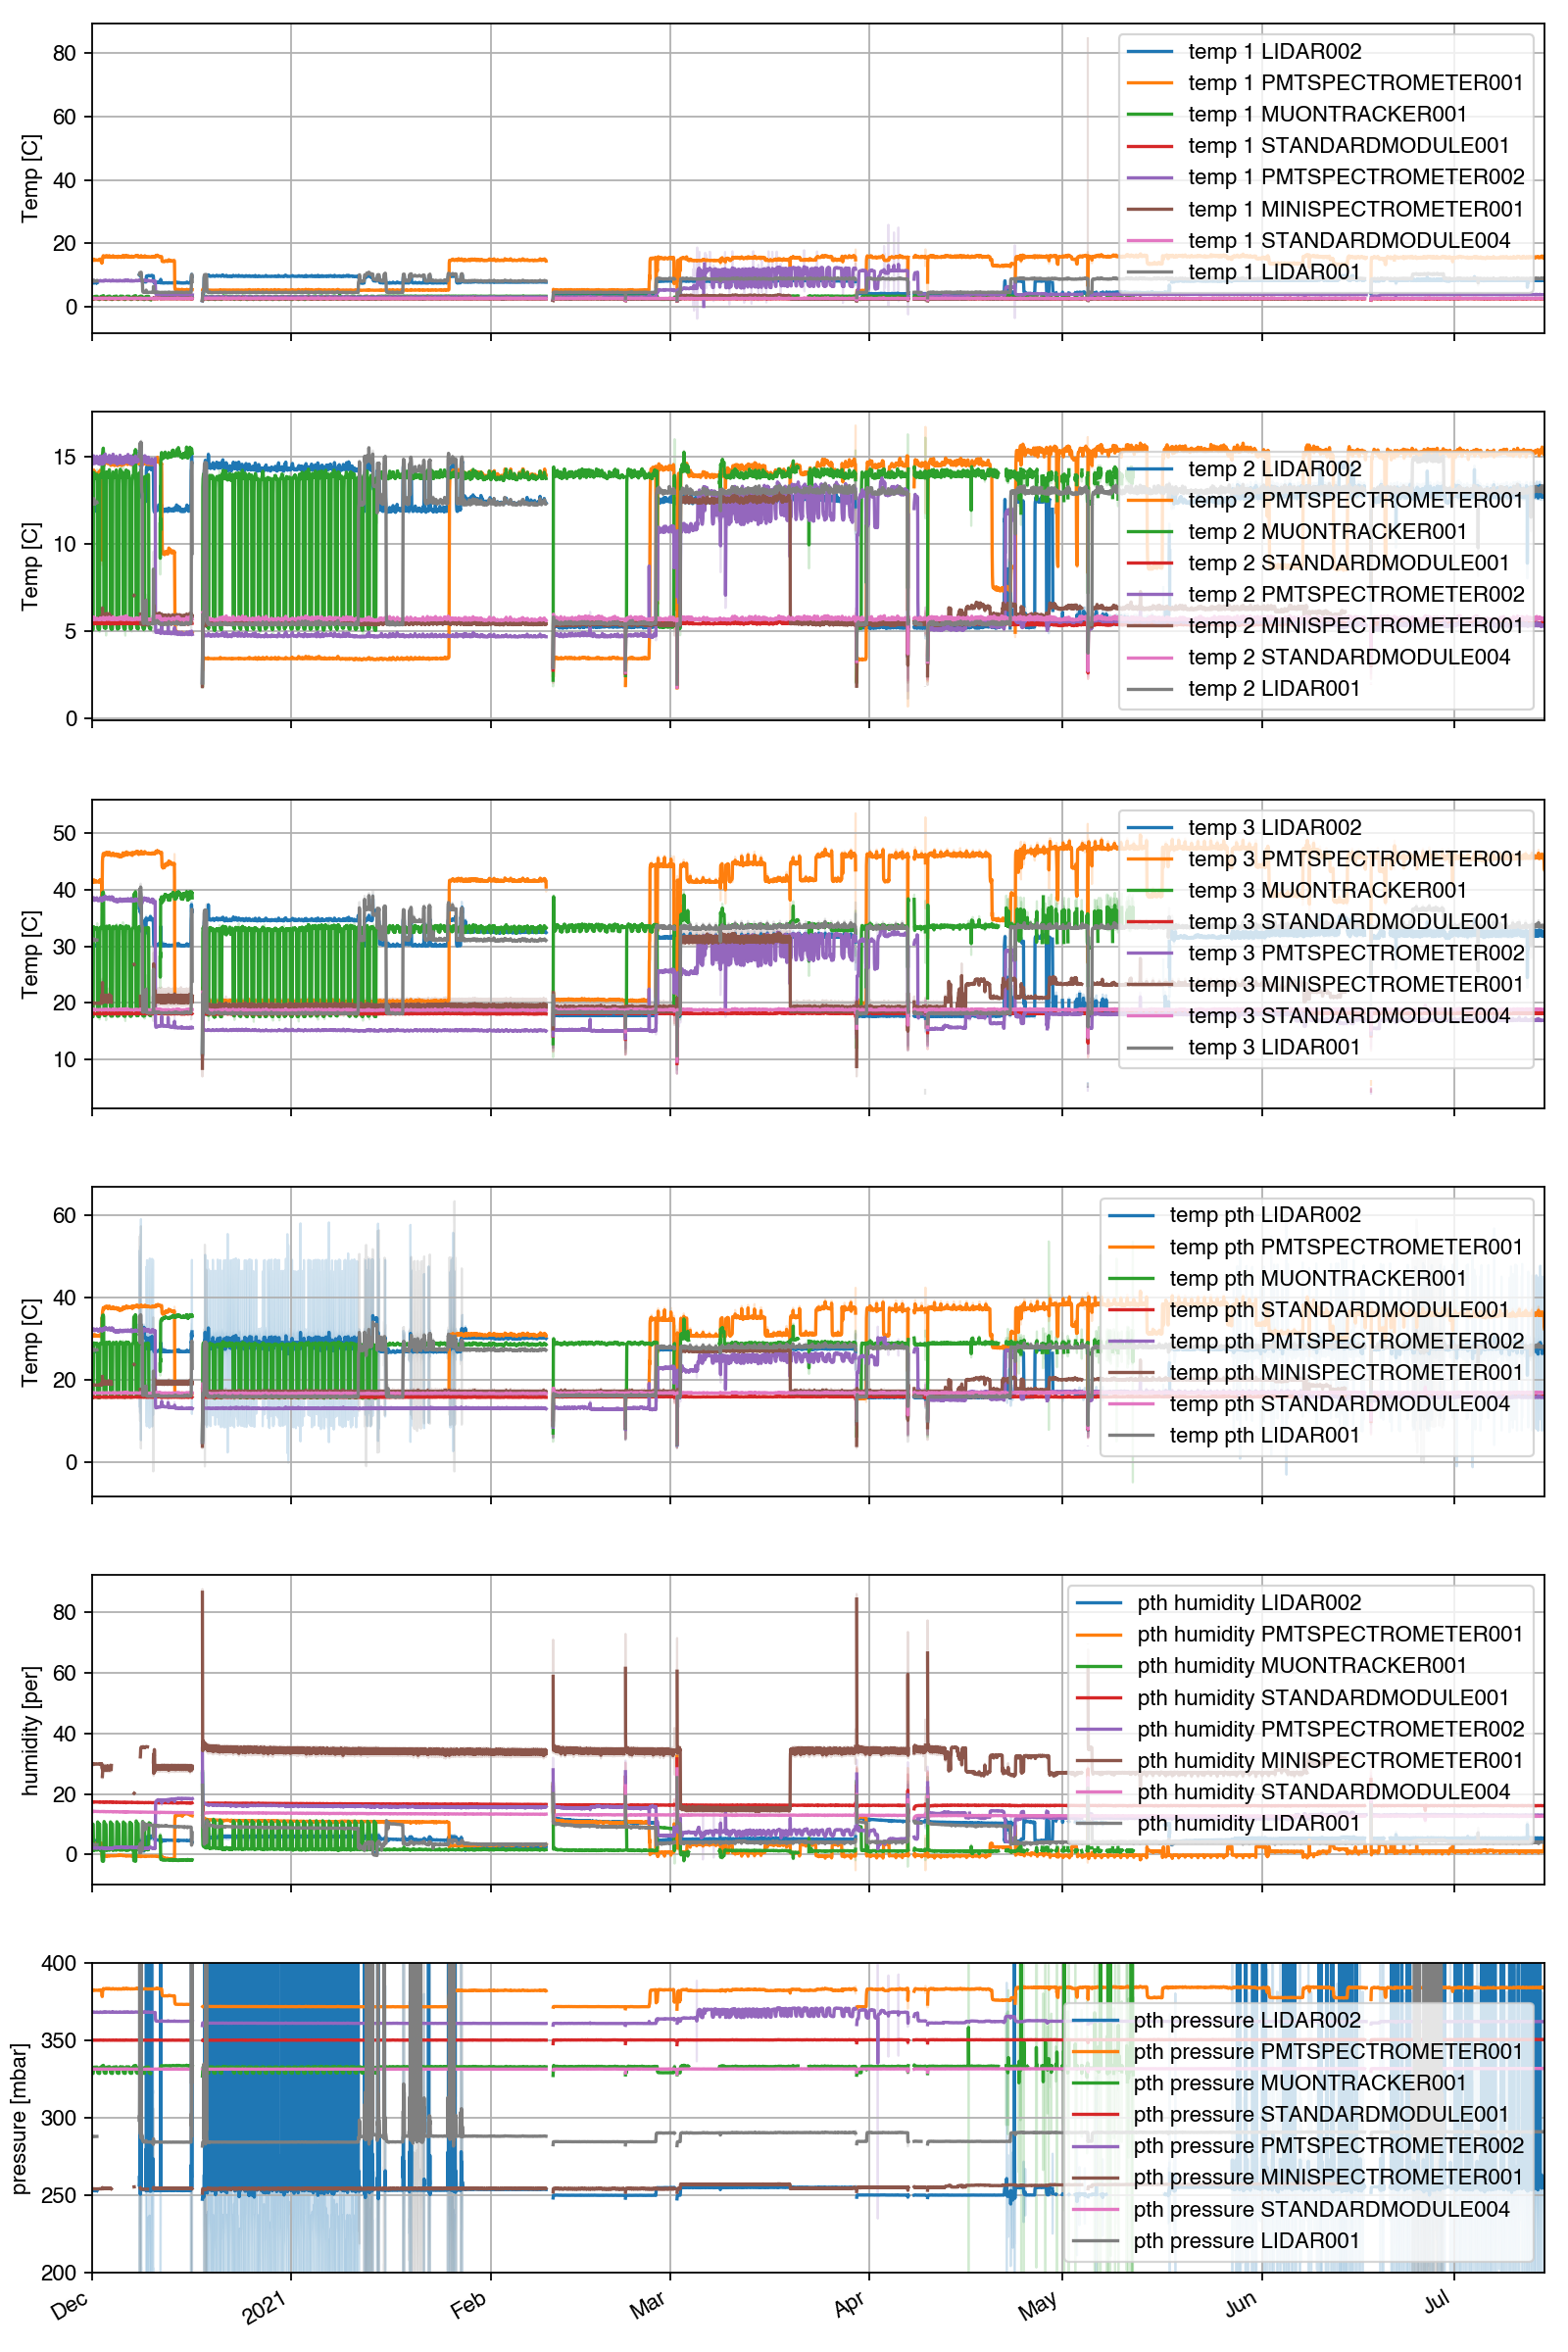

LIDAR002
PMTSPECTROMETER001
MUONTRACKER001
STANDARDMODULE001
PMTSPECTROMETER002
MINISPECTROMETER001
STANDARDMODULE004
LIDAR001


In [3]:
fig, ax = plt.subplots(nrows=6, squeeze=False, figsize=(10,15), sharex=True)
ax = ax.flatten()


for module in module_list:
    print(module.module)
    i = 0
    # TEMP.
    mask = module.temperatures_time[:] > datetime.datetime(year=2020,month=12,day=1).timestamp()
    plot_time = module.temperatures_time[:][mask]
    strawb.tools.plot_binned_mean(plot_time, module.temperatures_temp1[:][mask],
                                  ax=ax[i], label=f'temp 1 {module.module}')
    ax[i].set_ylabel('Temp [C]')
    i += 1

    strawb.tools.plot_binned_mean(plot_time, module.temperatures_temp2[:][mask],
                                  ax=ax[i], label=f'temp 2 {module.module}')
    ax[i].set_ylabel('Temp [C]')
    i += 1

    strawb.tools.plot_binned_mean(plot_time, module.temperatures_temp3[:][mask],
                                  ax=ax[i], label=f'temp 3 {module.module}')
    ax[i].set_ylabel('Temp [C]')
    i += 1

    # PTH
    mask = module.pth_time[:] > datetime.datetime(year=2020,month=12,day=1).timestamp()
    plot_time = module.pth_time[:][mask]
    strawb.tools.plot_binned_mean(plot_time, module.pth_temperature[:][mask],
                                  ax=ax[i], label=f'temp pth {module.module}')
    ax[i].set_ylabel('Temp [C]')
    i += 1

    strawb.tools.plot_binned_mean(plot_time, module.pth_humidity[:][mask],
                                  ax=ax[i], label=f'pth humidity {module.module}')
    ax[i].set_ylabel('humidity [per]')
    i += 1

    strawb.tools.plot_binned_mean(plot_time, module.pth_pressure[:][mask],
                                  ax=ax[i], label=f'pth pressure {module.module}')
    ax[i].set_ylabel('pressure [mbar]')
    i += 1

for ax_i in ax:
    ax_i.legend(loc=0)
    ax_i.grid()

# set limits
limits = np.array([[ax_i.dataLim.x0, ax_i.dataLim.x1] for ax_i in ax])
ax[-1].set_xlim((limits[:,0].min(), limits[:,1].max()))
    
fig.autofmt_xdate()
locator = mdates.AutoDateLocator()
#fmt = mdates.AutoDateFormatter(locator, usetex=True)
fmt = mdates.ConciseDateFormatter(locator)
ax[-1].xaxis.set_major_formatter(fmt)
plt.tight_layout()

In [8]:
import datetime
date_str = [f_names_i.split(module_name+'_')[-1].split('.')[0] for f_names_i in f_names]
date_datetime = [datetime.datetime.strptime(date_i, '%Y%m%dT%H%M%S') for date_i in date_str]
date_np = np.array(date_datetime, dtype=np.datetime64)
size = np.array([os.path.getsize(f_names_i) for f_names_i in f_names])

In [4]:
ax_i.set_ylim(200,400)

(200.0, 400.0)

<IPython.core.display.Javascript object>


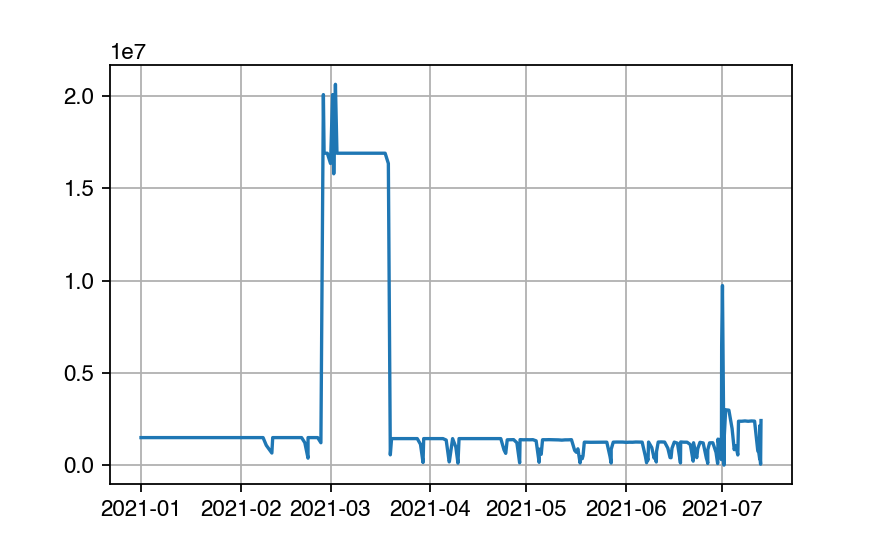

In [9]:
plt.figure()
plt.plot(date_np, size)
plt.grid()